<a href="https://colab.research.google.com/github/Amasha03/Customer_Churn_Prediction/blob/main/notebooks/01_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telco Customer Churn Prediction
### CM2604 Machine Learning CourseWork
Student Name : Amasha Widanagamage  
RGU ID       : 2425800  
IIT ID       : 20241246


In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#plt.style.use('seaborn-v0_8-darkgrid')
#sns.set_palette("husl")

print("Libraries imported successfully")

Libraries imported successfully


In [3]:
#Load dataset
from google.colab import drive
df=pd.read_csv('/content/drive/MyDrive/ML/coursework/Telco-Customer-Churn.csv')

print(f"Dataset loaded successfully!")
print(f"Loaded: {df.shape[0]} rows x {df.shape[1]} columns")
print(f"\n First 5 rows:")
df.head()   #display the first 5 rows of the dataset

Dataset loaded successfully!
Loaded: 7043 rows x 21 columns

 First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Overview
print("Basic information about the dataset:")
df.info()

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paper

In [7]:
#Data types
print("\nData types:")
df.dtypes


Data types:


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [13]:
#Summary of statistics(Numerical)
print("\nSummary statistics (Numerical):")
df.describe()


Summary statistics (Numerical):

Summary statistics (Categorical):


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [12]:
#Summary of statistics(Categorical)
print("\nSummary statistics (Categorical):")
df.describe(include='O')



Summary statistics (Categorical):


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174



Missing values:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


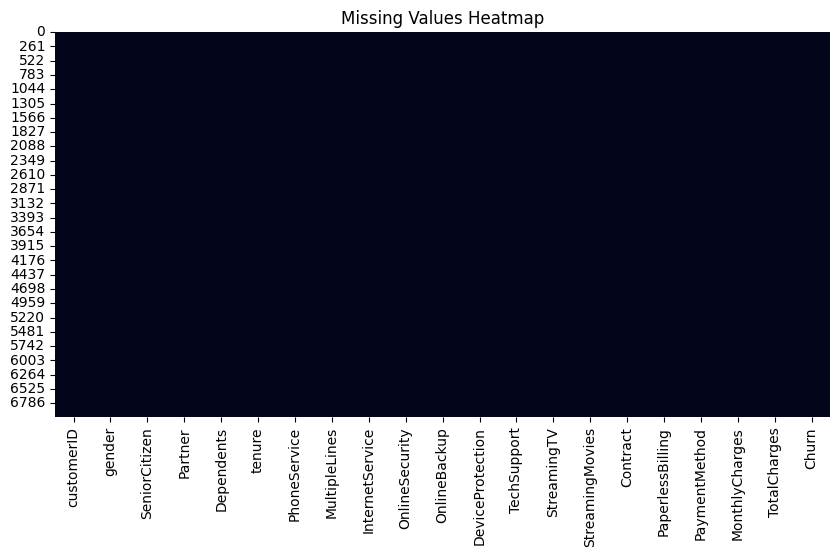

In [27]:
#Check for missing values
print("\nMissing values:")
missingValues=df.isnull().sum()
print(missingValues)

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=False)  #For this missing values there's only 2 colors for missing and not missing.So the color bar is not necessary.
plt.title("Missing Values Heatmap")
plt.show()

#This heatmap shows how the missing values are spread among the dataset.
#It is one color because this doesnt have any missing values.


In [28]:
#Checking for duplicate values
print("\nDuplicate values:")
duplicateValues=df.duplicated().sum()
print(duplicateValues)

#No duplicated values in the dataset


Duplicate values:
0


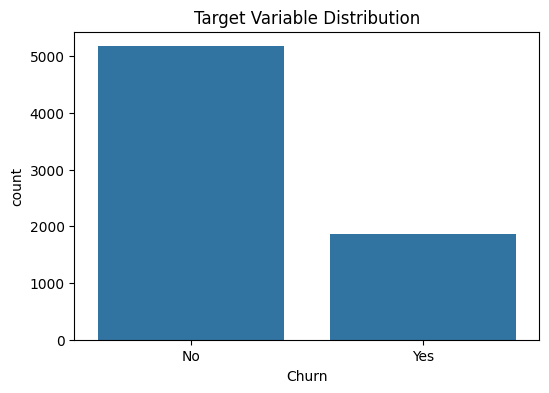


Churn percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [30]:
#Target variable distribution

plt.figure(figsize=(6,4))
sns.countplot(x="Churn",data=df)
plt.title("Target Variable Distribution")
plt.show()

#Percentage
print("\nChurn percentage:")
print(df['Churn'].value_counts(normalize=True)*100)

#As this dataset represent 26% churned and 73% didnt churn, It makes this dataset imbalanced.

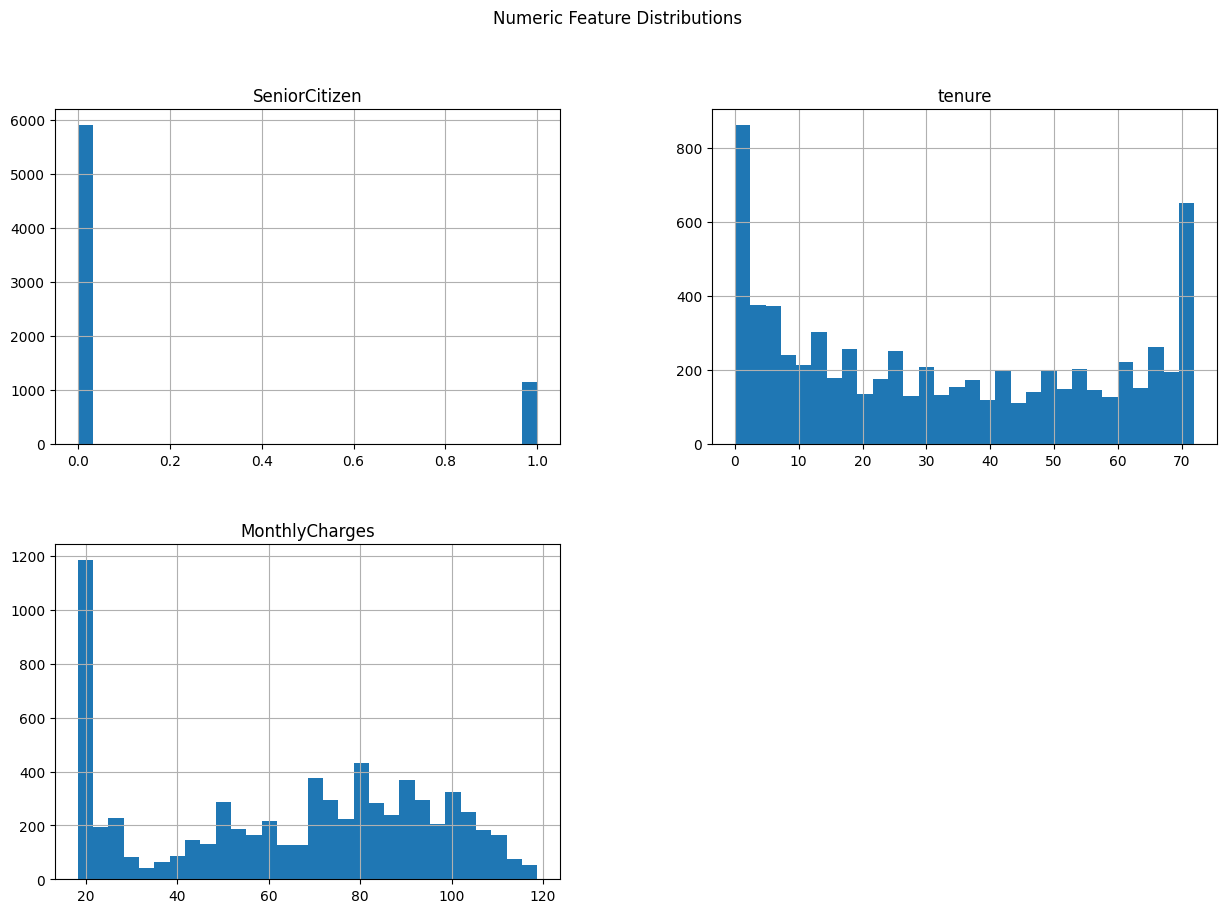

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7d8001b25ee0> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7d8001b25940> (for post_execute):


KeyboardInterrupt: 

In [31]:
#Univariate Analysis
numeric_cols=df.select_dtypes(include=np.number).columns
categorical_cols=df.select_dtypes(include='object').columns

#Histograms for numeric feayures
df[numeric_cols].hist(figsize=(15,10),bins=30)
plt.suptitle("Numeric Feature Distributions")
plt.show()

#Countplots for categorical features
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(x=df[col])
    plt.xticks(rotation=45)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)